# import dataset

In [206]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [207]:
# load data
df = pd.read_csv("../../data/winequality-red.csv", delimiter = ';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [208]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [209]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [210]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## access target - quality

In [211]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

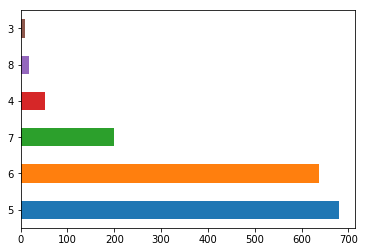

In [212]:
df.quality.value_counts().plot('barh')

In [213]:
df.quality.isnull().sum()

0

In [214]:
# catagrize quality to low, high
def catagrize_quality(q):
    if q > 6:
        return 1
    else:
        return 0
    
df['quality'] = df.quality.apply(catagrize_quality)
                

In [218]:
df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

## assess features

In [219]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

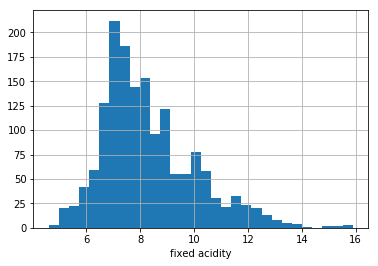

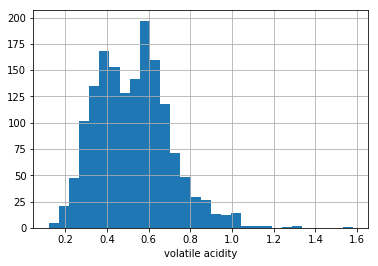

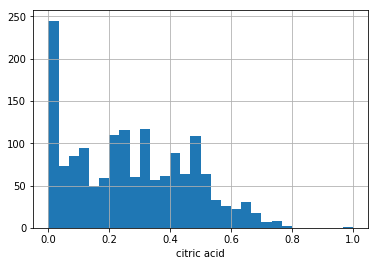

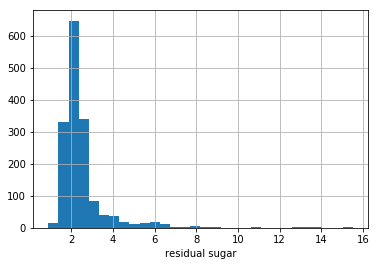

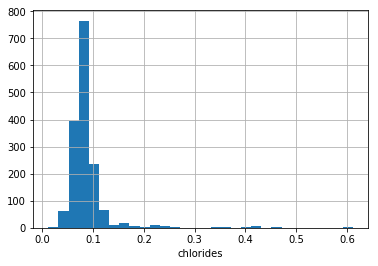

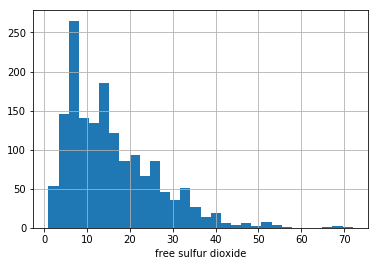

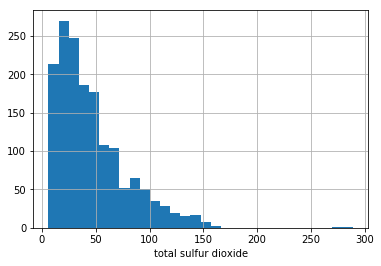

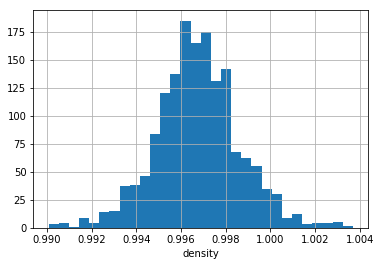

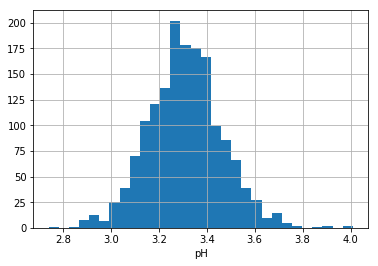

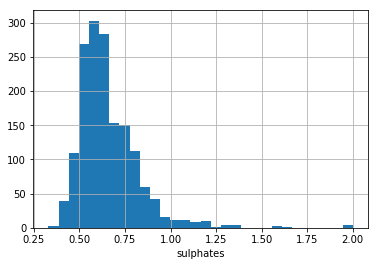

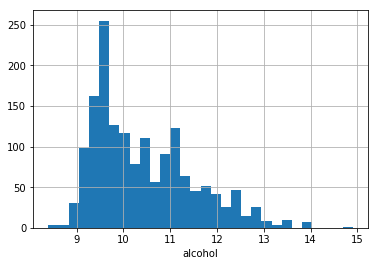

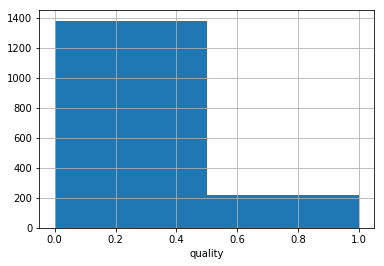

In [220]:
# Print the distibutions

for f in df.columns:
    try:
        fig = plt.figure()
        num_bins = min((30, len(df[f].unique())))
        df[f].hist(bins=num_bins)
        plt.xlabel(f)
    except TypeError:
        print()
        print(df[f].value_counts())
        print('-'*30)
        plt.close()

In [221]:
df.isnull().sum()/len(df) * 100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

## training models

In [222]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [223]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
X = df[features].values
y = df.quality.values


In [330]:
# Instantiate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier



In [331]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, random_state=1)

In [332]:
#scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [333]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from mlxtend.plotting import plot_decision_regions

def check_model_fit(clf, X_test, y_test):
    # Print overall test-set accuracy
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('accuracy = {:.1f}%'.format(acc*100))
    
    print('percent accuracy score per class:')
    cmat = confusion_matrix(y_test, y_pred)
    scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    print('quality = 0 : {:.2f}%'.format(scores[0]))
    print('quality = 1 : {:.2f}%'.format(scores[1]))


In [334]:
svm = SVC(kernel='rbf', C=1, random_state=1, class_weight='balanced')
svm.fit(X_train_std, y_train)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [335]:
check_model_fit(svm, X_test_std, y_test)

accuracy = 79.0%
percent accuracy score per class:
quality = 0 : 79.53%
quality = 1 : 74.55%


In [336]:
# cross validation
scores = []
for val in range(1, 41):
    clf = RandomForestClassifier(n_estimators=val)
    validated = cross_val_score(clf, X, y, cv=10, scoring='f1')
    scores.append(validated)


Text(0,0.5,'classification scores')

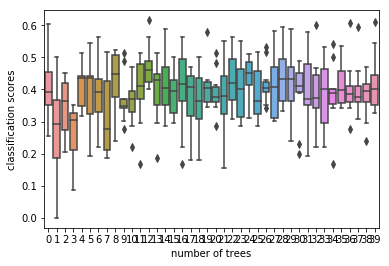

In [337]:
sns.boxplot(data=scores)
plt.xlabel('number of trees')
plt.ylabel('classification scores')


In [338]:
# cut-off
clf = RandomForestClassifier(n_estimators=15)
clf.fit(X_train_std, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [339]:
# Access feature importances
d = (clf.feature_importances_, df.columns)
list(zip(*d))

[(0.08491485964191241, 'fixed acidity'),
 (0.11893429586839915, 'volatile acidity'),
 (0.08663736243187212, 'citric acid'),
 (0.06231915973835532, 'residual sugar'),
 (0.08021551551032419, 'chlorides'),
 (0.056179007067257765, 'free sulfur dioxide'),
 (0.07348004514261329, 'total sulfur dioxide'),
 (0.08912223043262202, 'density'),
 (0.05067333453465621, 'pH'),
 (0.11884297766974299, 'sulphates'),
 (0.17868121196224454, 'alcohol')]

Text(0.5,0,'Feature importance')

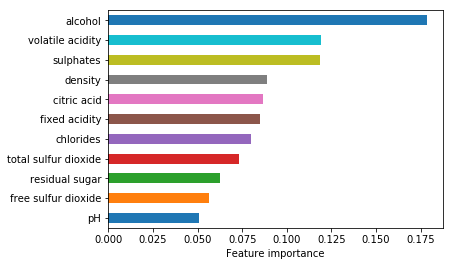

In [340]:
# Visualize the feature importances

pd.Series(clf.feature_importances_, name='Feature importance',
            index=df[features].columns)\
    .sort_values()\
    .plot.barh()
plt.xlabel('Feature importance')
